In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.api as sms 
import seaborn as sns
%matplotlib inline

# Sample size

In [21]:
# Pageviews sample size for improving retention benchmark
es = sms.proportion_effectsize(0.53, 0.53+0.01)
sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1)

39050.67796811014

In [22]:
# Pageviews sample size for improving net conversion benchmark
es = sms.proportion_effectsize(0.109313, 0.109313+0.0075)
sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1)

27977.96232476509

# Analysis

In [8]:
control = pd.DataFrame.from_csv("control.csv")
baseline = pd.DataFrame.from_csv("baseline.csv")
experiment = pd.DataFrame.from_csv("experiment.csv")

In [9]:
baseline = baseline.transpose()
baseline

Unique cookies to view page per day:,"Unique cookies to click ""Start free trial"" per day:",Enrollments per day:,"Click-through-probability on ""Start free trial"":","Probability of enrolling, given click:","Probability of payment, given enroll:","Probability of payment, given click"
40000,3200.0,660.0,0.08,0.20625,0.53,0.109313


In [10]:
experiment['ctp'] = experiment.Clicks/experiment.Pageviews
experiment['gross_conv'] = experiment.Enrollments/experiment.Clicks
experiment['retention'] = experiment.Payments/experiment.Enrollments
experiment['net_conv'] = experiment.Payments/experiment.Clicks

In [15]:
control['ctp'] = control.Clicks/control.Pageviews
control['gross_conv'] = control.Enrollments/control.Clicks
control['retention'] = control.Payments/control.Enrollments
control['net_conv'] = control.Payments/control.Clicks

In [16]:
experiment.head()

,Pageviews,Clicks,Enrollments,Payments,ctp,gross_conv,retention,net_conv
Date,,,,,,,,
"Sat, Oct 11",7716,686,105.0,34.0,0.088906,0.153061,0.323810,0.049563
"Sun, Oct 12",9288,785,116.0,91.0,0.084518,0.147771,0.784483,0.115924
"Mon, Oct 13",10480,884,145.0,79.0,0.084351,0.164027,0.544828,0.089367
"Tue, Oct 14",9867,827,138.0,92.0,0.083815,0.166868,0.666667,0.111245
"Wed, Oct 15",9793,832,140.0,94.0,0.084959,0.168269,0.671429,0.112981


In [31]:
control.head()

,Pageviews,Clicks,Enrollments,Payments,ctp,gross_conv,retention,net_conv
Date,,,,,,,,
"Sat, Oct 11",7723,687,134.0,70.0,0.088955,0.195051,0.522388,0.101892
"Sun, Oct 12",9102,779,147.0,70.0,0.085586,0.188703,0.476190,0.089859
"Mon, Oct 13",10511,909,167.0,95.0,0.086481,0.183718,0.568862,0.104510
"Tue, Oct 14",9871,836,156.0,105.0,0.084693,0.186603,0.673077,0.125598
"Wed, Oct 15",10014,837,163.0,64.0,0.083583,0.194743,0.392638,0.076464


In [17]:
experiment.describe()

,Pageviews,Clicks,Enrollments,Payments,ctp,gross_conv,retention,net_conv
count,37.000000,37.000000,23.000000,23.000000,37.000000,23.000000,23.000000,23.000000
mean,9315.135135,765.540541,148.826087,84.565217,0.082191,0.199566,0.573140,0.113373
std,708.070781,64.578374,33.234227,23.060841,0.003116,0.047451,0.127571,0.032176
min,7664.000000,642.000000,94.000000,34.000000,0.074133,0.144172,0.323671,0.049563
25%,8881.000000,722.000000,127.000000,69.000000,0.079855,0.163866,0.490520,0.090700
50%,9359.000000,770.000000,142.000000,91.000000,0.082722,0.177907,0.565934,0.112981
75%,9737.000000,827.000000,172.000000,99.000000,0.084351,0.236080,0.663399,0.138564
max,10551.000000,884.000000,213.000000,123.000000,0.088906,0.284341,0.784483,0.170360


In [18]:
control.describe()

,Pageviews,Clicks,Enrollments,Payments,ctp,gross_conv,retention,net_conv
count,37.000000,37.000000,23.000000,23.000000,37.000000,23.000000,23.000000,23.000000
mean,9339.000000,766.972973,164.565217,88.391304,0.082129,0.220351,0.539797,0.118269
std,740.239563,68.286767,29.977000,20.650202,0.003229,0.044043,0.094255,0.029405
min,7434.000000,632.000000,110.000000,56.000000,0.071338,0.167679,0.325243,0.076464
25%,8896.000000,708.000000,146.500000,70.000000,0.079601,0.190279,0.467103,0.100620
50%,9420.000000,759.000000,162.000000,91.000000,0.082909,0.195187,0.554545,0.110759
75%,9871.000000,825.000000,175.000000,102.500000,0.084117,0.237767,0.592556,0.131081
max,10667.000000,909.000000,233.000000,128.000000,0.088955,0.326895,0.727273,0.185239


/Users/victorvulovic/anaconda/envs/gu/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/victorvulovic/anaconda/envs/gu/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/victorvulovic/anaconda/envs/gu/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


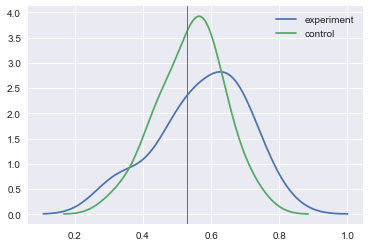

In [29]:
sns.kdeplot(experiment.retention, label="experiment")
sns.kdeplot(control.retention, label="control")
sns.rugplot(baseline['Probability of payment, given enroll:'], height=1)
plt.legend();